In [377]:
from pytrends.request import TrendReq
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib as plt
import requests
import json
%matplotlib inline

response = requests.get('https://api.coindesk.com/v1/bpi/historical/close.json?start=2011-05-01&end=2017-11-18')
json_data = json.loads(response.content)
bpi = pd.DataFrame.from_dict(json_data)
bpi.drop(['disclaimer', 'time'], axis=1, inplace=True)
bpi.drop(['updated', 'updatedISO'], inplace=True)
bpi['date'] = bpi.index
bpi['date'] = pd.to_datetime(bpi['date'], format="%Y-%m-%d")
bpi.index = range(2394)
cols = bpi.columns.tolist()
cols = cols[-1:] + cols[:-1]
bpi = bpi[cols] 

In [378]:
google = pd.read_csv("../data/google_trends.csv", ";")
datetime_object = datetime.strptime(google.loc[0][0], '%d.%m.%y')
google['date'] = pd.to_datetime(google['date'], format="%d.%m.%y")
google['search_volume'] = google['search_volume'].str.replace(',','.')
google['search_volume'] = google['search_volume'].apply(pd.to_numeric)
#google.set_index('date', inplace=True)

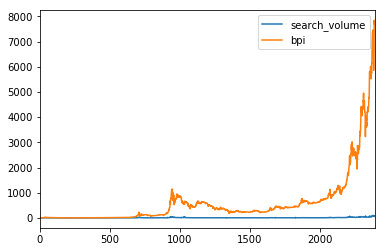

In [379]:
ax = google.plot()
bpi.plot(ax=ax)

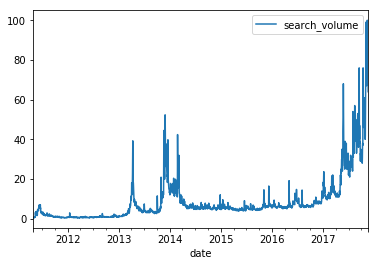

In [380]:
google.plot(x='date', y='search_volume')

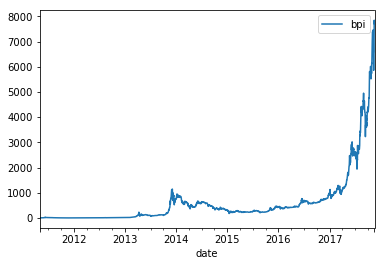

In [381]:
bpi.plot(x='date', y='bpi')

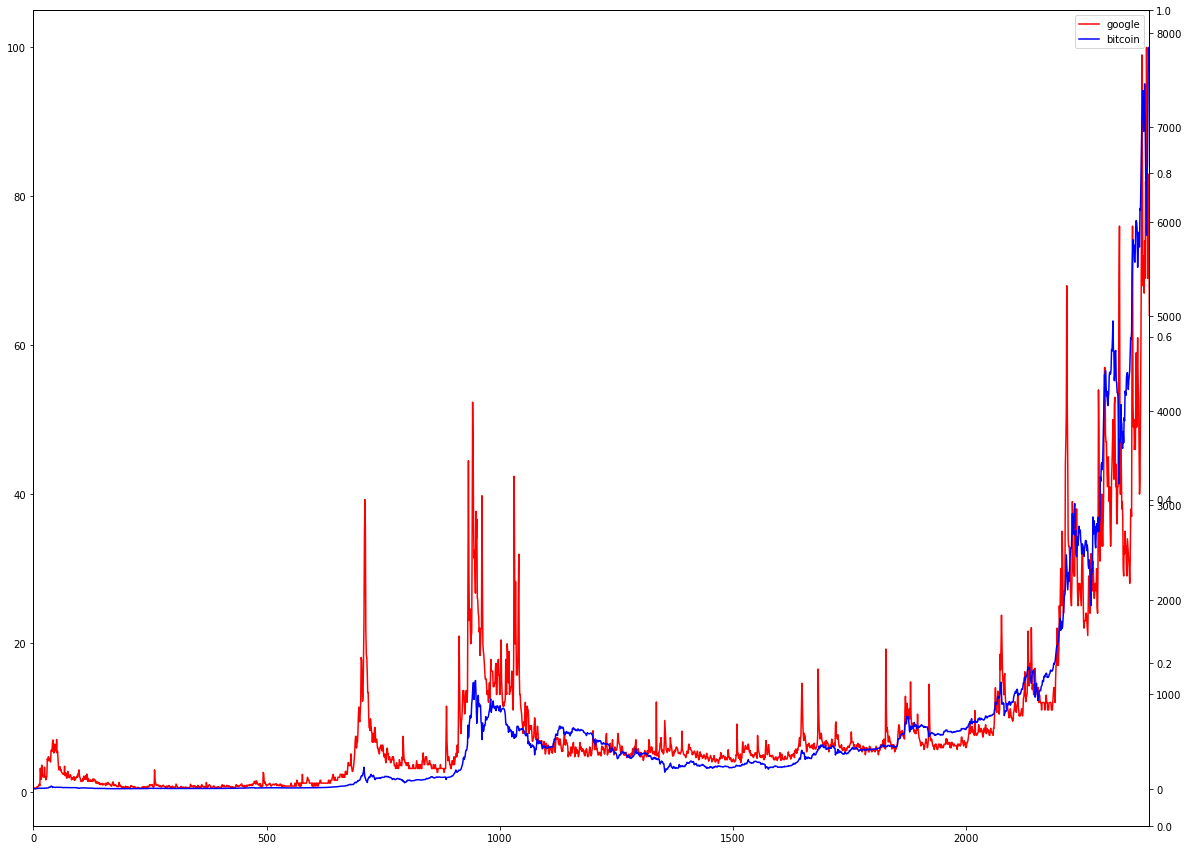

In [382]:
#source: https://stackoverflow.com/a/11643893
fig, ax = plt.pyplot.subplots()
fig.set_size_inches(20, 15)
ax3 = ax.twinx()
rspine = ax3.spines['right']
rspine.set_position(('axes', 1)) #specifies distance of some unneeded axis?
ax3.set_frame_on(True)
ax3.patch.set_visible(False)
fig.subplots_adjust()


google.search_volume.plot(ax=ax, style='r-')
bpi.bpi.plot(ax=ax, style='b-', secondary_y=True)

ax3.legend([ax.get_lines()[0],
            ax.right_ax.get_lines()[0]],\
           ['google','bitcoin'], bbox_to_anchor=(1, 1)) #specifies distance of legend

In [376]:
from scipy.stats.stats import pearsonr   